Problem Statement: The prominence of social media and online reviews has heightened the demand for

accurate sentiment analysis methods. One crucial aspect of sentiment analysis is Aspect-
Based Sentiment Analysis (ABSA), which revolves around identifying and assessing

sentiments towards specific aspects within a text. However, the detection of sarcasm
within these texts poses a significant challenge. Sarcasm often reverses the expressed
sentiment, making it difficult for conventional ABSA methods to correctly interpret the
intended meaning. The intricate nature of sarcasm makes it challenging to accurately
detect in text. Traditional machine learning approaches and early deep learning models
have struggled to capture the nuances of sarcasm, frequently leading to
misinterpretation of the sentiment. Rajani, Saxena, & Kumar (2023) suggest that many
existing models cannot effectively handle the complexity of sarcastic expressions,
resulting in poor sentiment classification performance.

The text representation techniques utilized in previous studies have proven to be
insufficient for sarcasm detection. Methods such as TF-IDF, GloVe, and Word2Vec,
while effective for general text representation, fall short in capturing the subtle patterns
and context required to understand sarcasm. According to Razali et al. (2021) and Tan

11

et al. (2023), these techniques overlook the full context of the text, which is crucial for
accurately interpreting sarcastic remarks. Consequently, these methods often lead to
misclassification of sentiments in sarcastic statements.

Despite the advancements in deep learning, the utilization of state-of-the-art
transformer models like BERT in ABSA, particularly for sarcasm detection, remains
limited. While BERT has displayed superior performance in various NLP tasks due to
its bidirectional training and contextual embedding capabilities, its potential has not
been fully explored in the context of ABSA for sarcasm. Javdan & Minaei-Bidgoli
(2020) and Dong, Li, & Choi (2020) point out that most studies have either overlooked
BERT or have not fully leveraged its capacity for aspect extraction and sarcasm
detection, missing out on the significant improvements it could bring.

To address these gaps, this research suggests incorporating sarcasm detection in
ABSA by leveraging deep learning techniques such as Convolutional Neural Networks
(CNNs), Recurrent Neural Networks (RNNs), and transformers like BERT. BERT's
ability to capture rich contextual embeddings from both preceding and succeeding text
makes it exceptionally well-suited for understanding the intricate nature of sarcastic
statements. By incorporating BERT into ABSA models, along with CNNs and RNNs,
we can enhance the precision of aspect detection and improve the overall sentiment
classification accuracy. This approach holds the potential to overcome the limitations of
previous methods and provide a more robust solution for handling sarcasm in sentiment
analysis, setting a new standard for future research in this field. Hybrid models that

combine ABSA and sarcasm detection are particularly promising, as they integrate fine-
grained sentiment analysis with the contextual understanding required to identify

sarcasm, leading to more accurate and robust sentiment analysis systems.

Research Objectives

1. To develop and evaluate hybrid models that integrate ABSA with sarcasm
detection to enhance sentiment analysis accuracy.

2. To investigate the performance of CNNs, RNNs and transformer BERT model in
detecting and interpreting sarcasm in text data.

3. To compare different deep learning algorithms and transformer model to
determine the most effective approach for sarcasm detection in ABSA.

Research Design

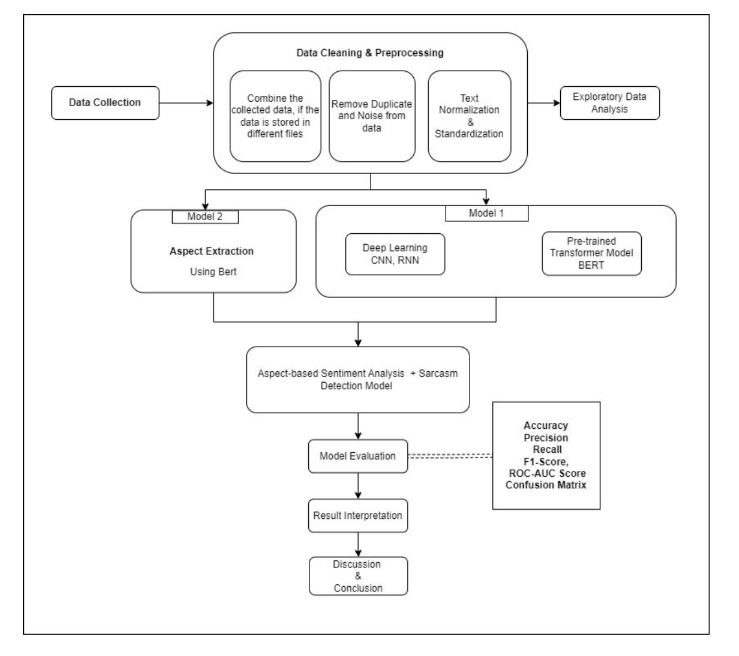


Dataset: https://www.kaggle.com/c/fake-news/data#

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Data**

In [ ]:


df1 = pd.read_csv("https://raw.githubusercontent.com/MuhammadShahzadRafiq/ABSA_Sarcasm_data/main/GEN-sarc-notsarc.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/MuhammadShahzadRafiq/ABSA_Sarcasm_data/main/HYP-sarc-notsarc.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/MuhammadShahzadRafiq/ABSA_Sarcasm_data/main/RQ-sarc-notsarc.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)


In [ ]:
df

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...
...,...,...,...
9381,sarc,1698,"Tell me genius, how is me accurately and corre..."
9382,sarc,1699,So you think it is a good idea for public scho...
9383,sarc,1700,"Now settle down charlie, and try to think rati..."
9384,sarc,1701,The VPC has a political agenda. The FBI? That ...


**Data Cleaning**

In [ ]:
!pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.6 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to normalize text
def normalize_text(text):
    return text.lower()

# Function to remove noise
def remove_noise(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Function for tokenization and lemmatization
lemmatizer = WordNetLemmatizer()
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Function to remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([token for token in tokens if token not in stop_words])

# Function for spell correction
spell = SpellChecker()
def correct_spelling(text):
    tokens = word_tokenize(text)
    corrected_tokens = [spell.correction(token) if spell.correction(token) else token for token in tokens]
    return ' '.join(corrected_tokens)

# Apply the cleaning functions
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(normalize_text)
df['text'] = df['text'].apply(remove_noise)
df['text'] = df['text'].apply(tokenize_and_lemmatize)
df['text'] = df['text'].apply(remove_stopwords)
#df['text'] = df['text'].apply(correct_spelling)

# Remove duplicate entries
df = df.drop_duplicates()

# Display the cleaned dataset
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,class,id,text
0,notsarc,1,thats true freedom speech doomed harassment su...
1,notsarc,2,neener neener time go playground yet
2,notsarc,3,like plastic gun fear armour piercing bullet f...
3,notsarc,4,geology religion werent see rock x formed
4,notsarc,5,well done monty mark first ever honest accurat...


**EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

**Class Distribution**

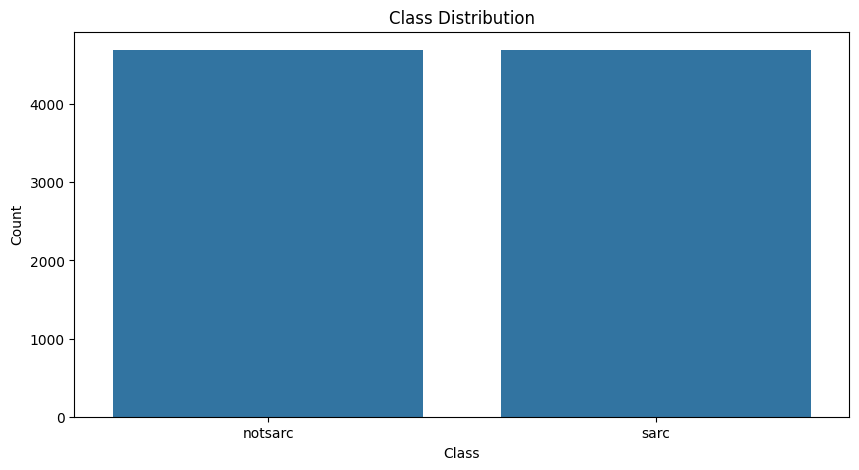

In [ ]:
class_distribution = df['class'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Text Length Distribution**

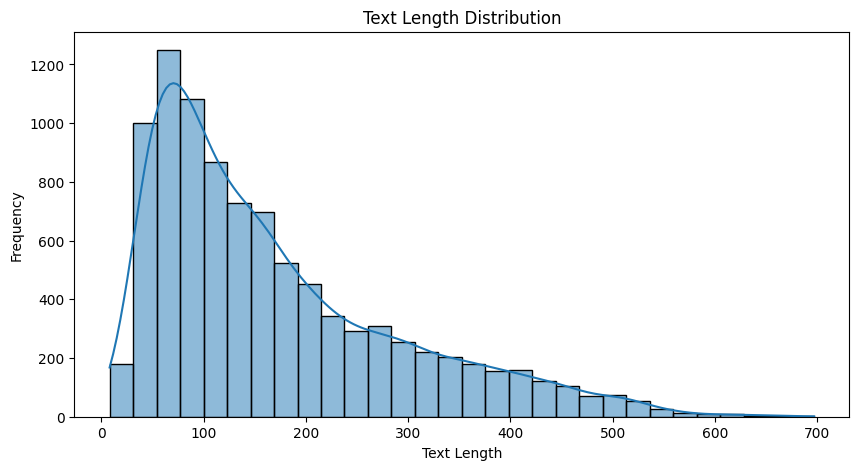

In [ ]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

**Most Frequent Words**

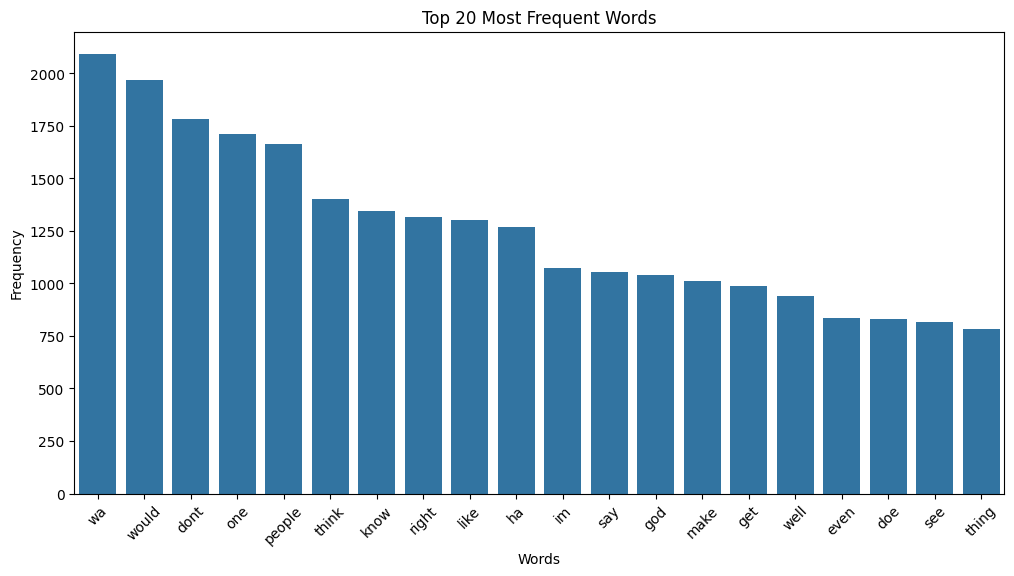

In [ ]:
all_words = ' '.join(df['text'])
word_tokens = word_tokenize(all_words)
word_freq = Counter(word_tokens)
common_words = word_freq.most_common(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Word Cloud**

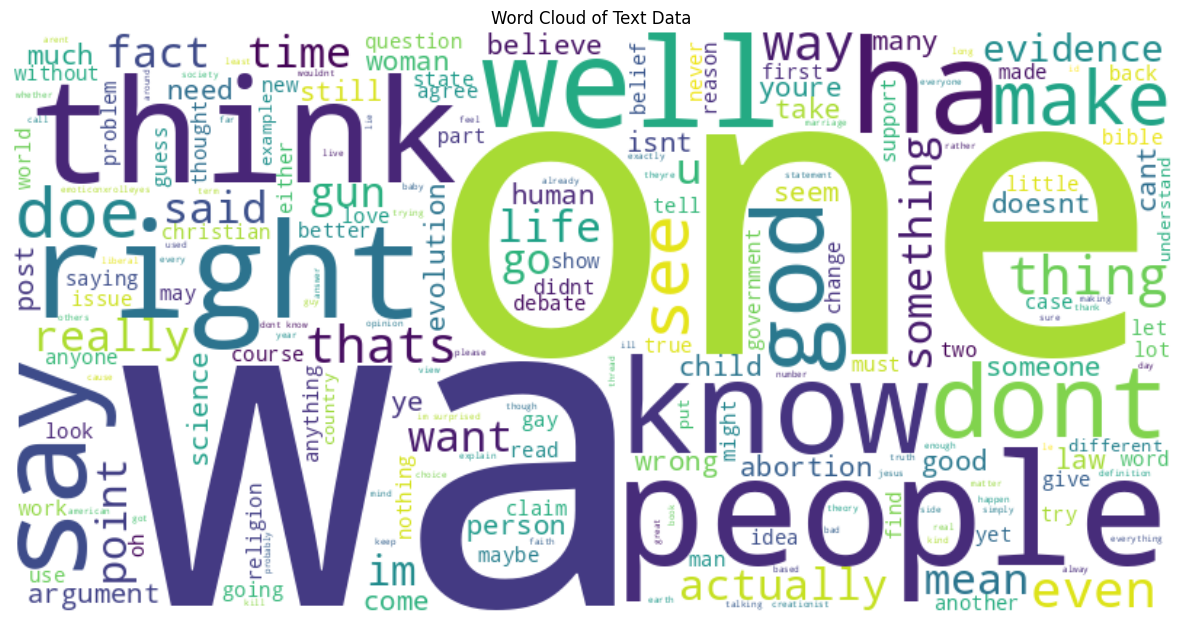

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

**Bigram and Trigram Analysis**

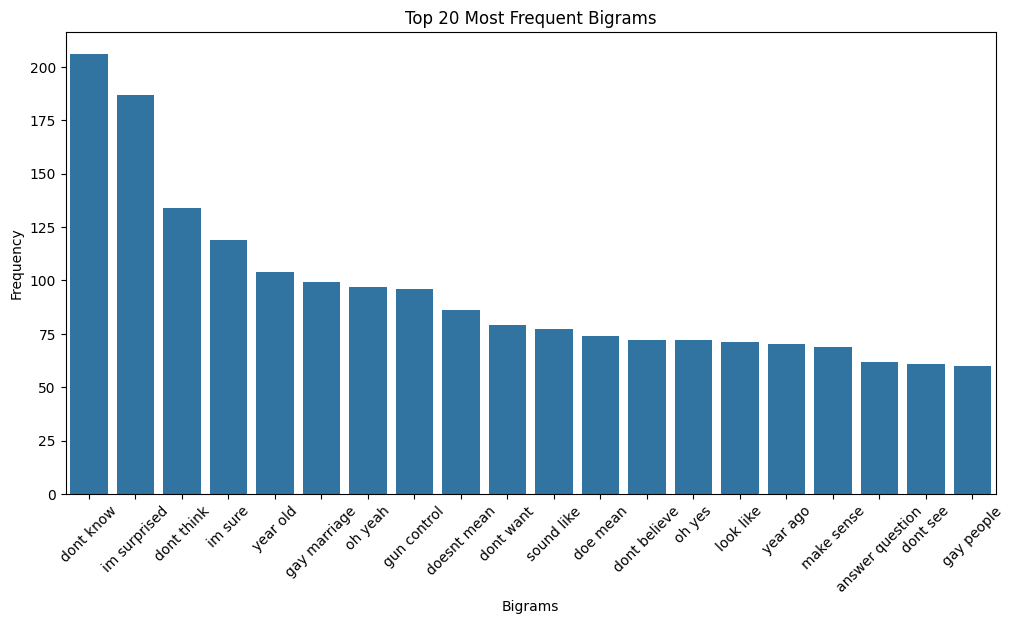

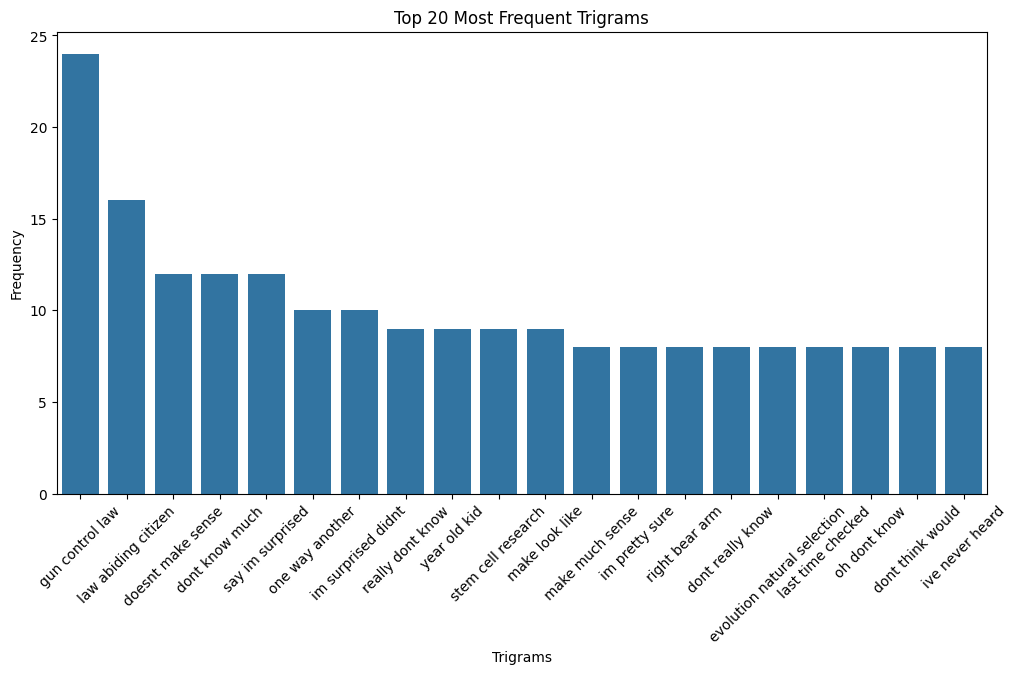

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

def get_top_ngrams(corpus, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Top 20 Bigrams
top_bigrams = get_top_ngrams(df['text'], n=2, top_k=20)
plt.figure(figsize=(12, 6))
sns.barplot(x=[b[0] for b in top_bigrams], y=[b[1] for b in top_bigrams])
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top 20 Trigrams
top_trigrams = get_top_ngrams(df['text'], n=3, top_k=20)
plt.figure(figsize=(12, 6))
sns.barplot(x=[t[0] for t in top_trigrams], y=[t[1] for t in top_trigrams])
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**Distribution of Words per Sentence**

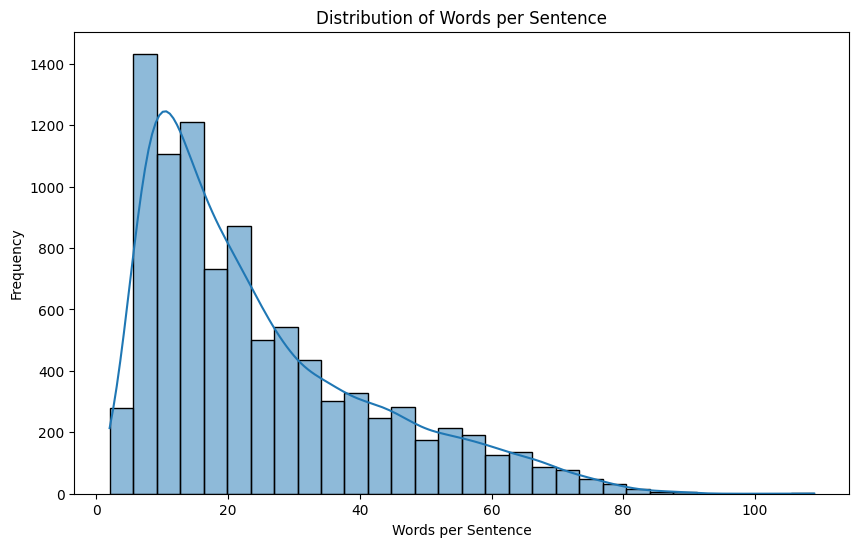

In [ ]:
df['words_per_sentence'] = df['text'].apply(lambda x: len(word_tokenize(x)) / len(nltk.sent_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['words_per_sentence'], bins=30, kde=True)
plt.title('Distribution of Words per Sentence')
plt.xlabel('Words per Sentence')
plt.ylabel('Frequency')
plt.show()

**Sentiment Distribution**

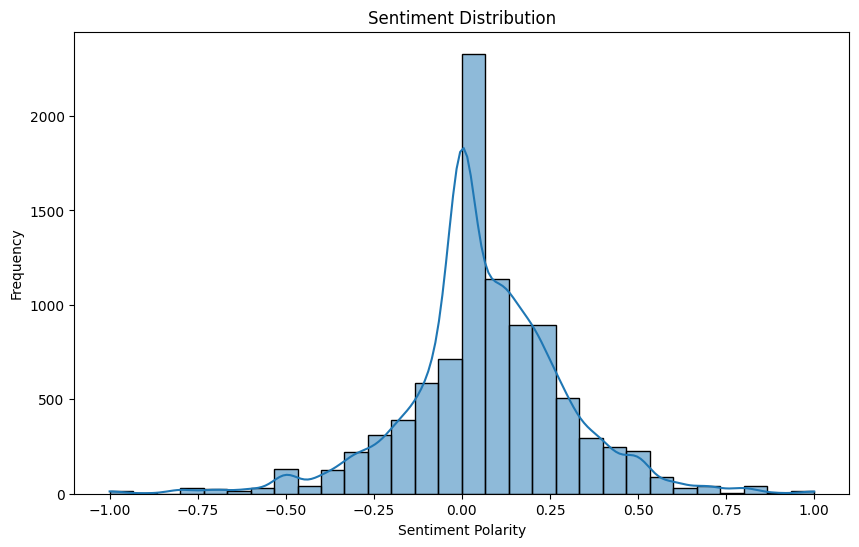

In [ ]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

**TF-IDF Cosine Similarity Analysis**

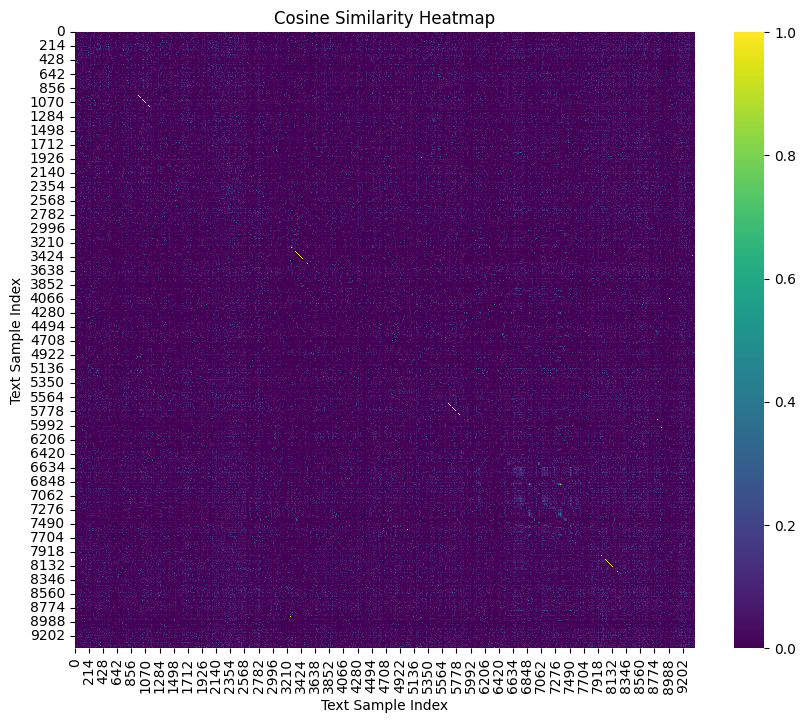

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim)

# Plotting the heatmap of cosine similarity
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, cmap='viridis')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Text Sample Index')
plt.ylabel('Text Sample Index')
plt.show()


**Chi-Square Test for Feature Relevance**

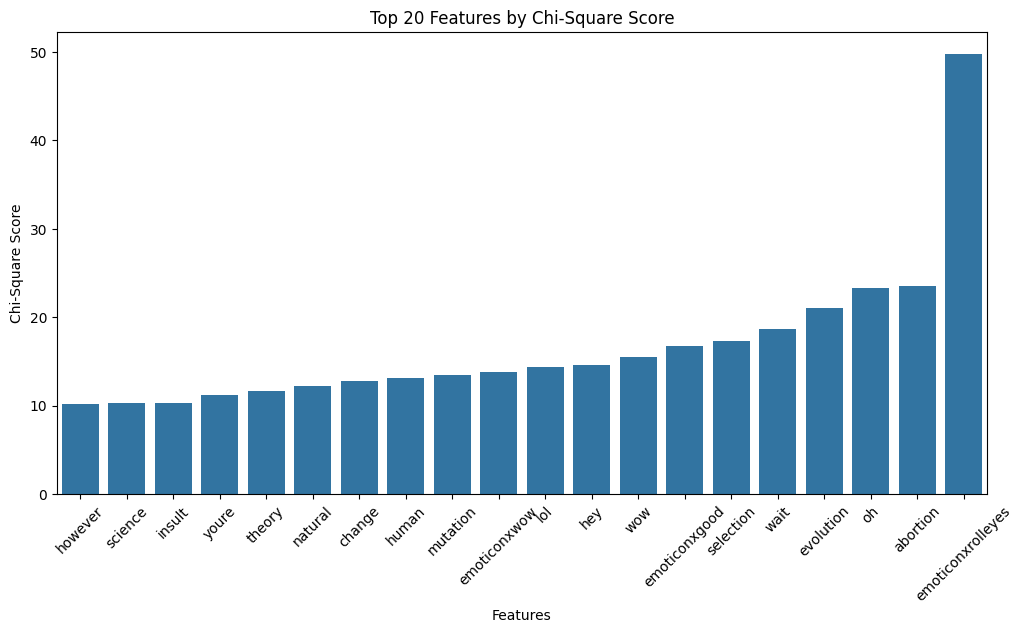

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text'])
y = df['class'].astype('category').cat.codes

# Perform Chi-Square test
chi2_scores, p_values = chi2(X, y)

# Get the top 20 features
top_features = np.argsort(chi2_scores)[-20:]
feature_names = vectorizer.get_feature_names_out()[top_features]
scores = chi2_scores[top_features]

# Plot the top features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_names, y=scores)
plt.title('Top 20 Features by Chi-Square Score')
plt.xlabel('Features')
plt.ylabel('Chi-Square Score')
plt.xticks(rotation=45)
plt.show()


**Polarity and Subjectivity Analysis**

In [ ]:
from textblob import TextBlob

df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=30, kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()





**Modelling**

Code Going on